In [ ]:
# the statsmodels.api uses numpy array notation
# statsmodels.formula.api use formula notation (similar to R's formula notation)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols

Races = [250,	240,	311,	313,	206,	307,	139,	306,	269,	215,	171,
               102,	199,	322,	161, 176, 246, 78,	204,	188,	173,	161,	164,
               210,	100,	115,	180,	146,	94,	42,	 177,	145,	256,	58,	230,
               72,	97,	102,	127,	183,	112,	112,	252,	201,	164, 176,	131,
               116,	123,	102]

Driver  = ["Lewis Hamilton",	"Sebastian Vettel",	"Fernando Alonso",	"Kimi Räikkönen",
           "Nico Rosberg",	"Michael Schumacher",	"Valtteri Bottas",	"Jenson Button",
           "Felipe Massa",	"Mark Webber",	"Daniel Ricciardo",	"Max Verstappen",
           "Alain Prost",	"Rubens Barrichello",	"Ayrton Senna",	"Sergio Pérez",
           "David Coulthard",	"Nico Hülkenberg",	"Nelson Piquet",	"Nigel Mansell",
           "Niki Lauda",	"Mika Häkkinen",	"Romain Grosjean",	"Gerhard Berger",
           "Jackie Stewart",	"Damon Hill",	"Ralf Schumacher",	"Carlos Reutemann",
           "Juan Pablo Montoya",	"Charles Leclerc",	"Graham Hill",	"Emerson Fittipaldi",
           "Riccardo Patrese",	"Juan Manuel Fangio",	"Giancarlo Fisichella",	"Jim Clark",
           "Robert Kubica",	"Carlos Sainz Jr.",	"Jack Brabham",	"Nick Heidfeld",
           "Jody Scheckter",	"Denny Hulme",	"Jarno Trulli",	"Jean Alesi",	"Jacques Villeneuve",
           "Jacques Laffite",	"Clay Regazzoni",	"Alan Jones",	"Ronnie Peterson",	"Bruce McLaren"]

Wins = [84,	53,	32,	21,	23,	91,	7,	15,	11,	9,	7,	8,	51,	11,	41,	0,	13,	0,	
        23,	31,	25,	20,	0,	10,	27,	22,	6,	12,	7,	2,	14,	14,	6,	24,	3,	
        25,	1,	0,	14,	0,	10,	8,	1,	1,	11,	6,	5,	12,	10,	4]

Winprobability = [0.3360,	0.2208,	0.1029,	0.0671,	0.1117,	0.2964,	0.0504,	0.0490,
                   0.0409,	0.0419,	0.0409,	0.0784,	0.2563,	0.0342,	0.2547,	0.0000,
                   0.0528,	0.0000,	0.1127,	0.1649,	0.1445,	0.1242,	0.0000,	0.0476,
                   0.2700,	0.1913,	0.0333,	0.0822,	0.0745,	0.0476,	0.0791,	0.0966,
                   0.0234,	0.4138,	0.0130,	0.3472,	0.0103,	0.0000,	0.1102,	0.0000,
                   0.0893,	0.0714,	0.0040,	0.0050,	0.0671,	0.0341,	0.0382,	0.1034,	0.0813,	0.0392]

Points = [3431, 2985,	1899,	1854,	1594.5,	1566,	1289,	1235,	1167,	1047.5,	1040,	948,	
          798.5,	658,	614,	580,	535,	511,	485.5,	482,	420.5,	420,	389,
          385,	360,	360,	329,	310,	307,	303,	289,	281,	281,	277.64,	275,
          274,	274,	267,	261,	259,	255,	248,	246.5,	241,	235,	228,	212,
          206,	206,	196.5]

Champion = [1, 1, 1,	1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
           0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]

df = pd.DataFrame( {"Races": Races, "Driver": Driver, "Wins": Wins, "Winprobability": Winprobability, "Points": Points, "Champion": Champion})
print(df)

    Races                Driver  Wins  Winprobability   Points  Champion
0     250        Lewis Hamilton    84          0.3360  3431.00         1
1     240      Sebastian Vettel    53          0.2208  2985.00         1
2     311       Fernando Alonso    32          0.1029  1899.00         1
3     313        Kimi Räikkönen    21          0.0671  1854.00         1
4     206          Nico Rosberg    23          0.1117  1594.50         1
5     307    Michael Schumacher    91          0.2964  1566.00         1
6     139       Valtteri Bottas     7          0.0504  1289.00         0
7     306         Jenson Button    15          0.0490  1235.00         1
8     269          Felipe Massa    11          0.0409  1167.00         0
9     215           Mark Webber     9          0.0419  1047.50         0
10    171      Daniel Ricciardo     7          0.0409  1040.00         0
11    102        Max Verstappen     8          0.0784   948.00         0
12    199           Alain Prost    51          0.25

In [ ]:
Reg = ols(formula = "Winprobability ~ Wins + Races", data = df)
Fit = Reg.fit()
print(Fit.summary())

                            OLS Regression Results                            
Dep. Variable:         Winprobability   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     80.07
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           7.28e-16
Time:                        07:57:55   Log-Likelihood:                 81.261
No. Observations:                  50   AIC:                            -156.5
Df Residuals:                      47   BIC:                            -150.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1217      0.018      6.583      0.0

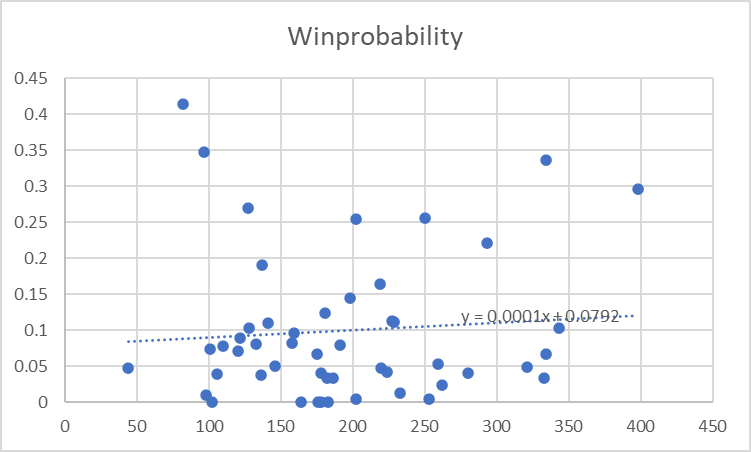

##Conclusiones generales##
R-squared: este nos indica la "variación porcentual en dependiente que es , explicada por variables independientes". En nuestro caso, el 77.3% de la variación en nuestra Y (que es "Winprobability"), es explicada por nuestras X ("Wins" y "Races"). El resto (22.7%) esta sin explicarse.

Prob (F-Statistic): nos inica la importancia general de la regresión, nos sivre para evaluar el nivel de significancia de todas las variables juntas. Este igual nos dice la probabilidad de que la hipótesis nula sea cierta. Según los resultados que vemos arriba, la probabilidad es cercana a cero, por lo tanto las regresiones son significativas.

Ahora hablando del valor de p, tenemos que fijarnos si hay un valor que nos de mayor que el nivel de significación, porque esto nos puede indicar que no hay pruebas suficientes en la muestra para poder concluir que exista una correlación distina que cero. En el ejemplo de arriba podemos ver que "Wins" y "Races" son estadísticamente significativas ya que sus valores p son iguales a 0.000.

La ecuación que viene en el gráfico nos indica que por cada carrera que gane un piloto durante su carrera su probabilidad de éxito aumenta 0.0001.

Viendo estos resultados podemos concluir que la probabilidad de que a un nuevo piloto le vaya bien es baja. Su probabilidad de éxito nada más aumentará si en sus años de experiencia, logra ganar muchas veces o la cantidad equivalente a la cantidad de carreras que ha hecho ("Races").


#Conclusiones#
**¿Cuál fue el motivo de elegir tu base de datos?**

La razón por la que escogimos esta base de datos es porque desde que eramos  chicas nos gustaba ver la F1, y nos encantaría saber más a detalle las probabilidades que existen dentro de este deporte, como por ejemplo, la probabilidad de que un nuevo piloto tenga éxito dentro de este deporte tan riesgoso. Durante los años, nos hemos dado cuenta que es sumamente difícil triunfar dentro de la F1. Tienes que tener un talento natural para el deporte, a parte de tener muchísima suerte de que la correcta escudería te quiera contratar. Son muchos factores que se deben tomar en cuenta para saber que tanto éxito puedes llegar a tener, nosotras en base a los años de experiencia y las veces que han ganado antiguos pilotos, sacamos la probabilidad de que un nuevo piloto le pueda ir bien en el futuro.

**¿Cuáles fueron tus fuentes para desarrollar el proyecto?**

Buscamos en internet la cantidad de puntos y campeonatos que los pilotos han tenido durante los años. La información no esta actualizada al 2022. La actualización de la información es del 2019.

**¿Cuáles fueron tus metas para tu entendimiento del proyecto?**

Nuestro principal objetivo era predecir la probabilidad de éxito de un nuevo piloto que entre a la F1. Las probabilidades pueden ser diferentes para cada época, ya que este deporte ha evolucionado desde que empezó hasta ahorita. Igual pudimos ver que entre más experiencia obtienes y menos carreras ganas, tu probabilidade de éxito ("Wins") va a ir disminuyendo.

**¿Qué elementos representativos tomaste en cuenta, esto es cuáles fueron tus variables explicativas y cuál fue tu variable responsiva?**

Nuestras variables explicativas fueron la cantidad de carreras que han tenido los pilotos, "Races", y la cantidad de veces que han ganado, "Wins".

Nuestra variable responsiva es la probabilidad de éxito, "Winprobability". 

###Conclusiones individuales###
Daniela: Creo que las regresiones lineales son sumamente importante en el mundo de los negocios. Nosotras que estudiamos Negocios Internacionales nos puede servir mucho a futuro. Poder predecir la probabilidad de éxito sobre algo dentro de una empresa puede evitar algún fracaso en el futuro, o disminuirlo. Usando el ejemplo de la F1, una nueva escudería podría estar interesada en entrar a la competencia, pero estan indecisos si les irá bien, o si vale la pena invertir una gran cantidad de dinero. Por eso este tipo de proyectos pueden ser de gran ayuda, para saber que tanta probabilidad tienen para que les vaya bien y en que se basa esa probabilidad, experiencia? dinero? En base a esto podrán saber cómo actuar y qué les conviene más hacer.

Fátima: Realizar este trabajo o examen final me ayudó a comprender de una forma práctica lo que son las regresiones lineales, como podemos aplicarlas en nuestro día a día y como por medio de la estadística podemos predecir lo que viene siendo un valor de datos desconocidos mediante el uso de otros valores (claramente relacionados) pero estos conocidos, en este caso usando el ejemplo de la Fórmula 1, un tema que me interesa mucho y por lo tanto, que me fue más sencillo entender. Claramente este tema al momento de comenzar mi vida laboral me puede ser de mucho uso ya que esto puede aplicarse a muchas áreas dentro de una empresa para saber qué es lo que debe hacerse  debido a que se hará o se predecirá más bien, el comportamiento de alguna variable que se esté evaluando (por ejemplo, querer predecir lo que vienen siendo las ventas a nivel anual partir de distintas variables).

